C:\Users\Admin\AppData\Local\Temp\ipykernel_19368\621013203.py:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  air_passengers["1952"].plot(kind = "bar", legend = False)


<Axes: xlabel='Month'>

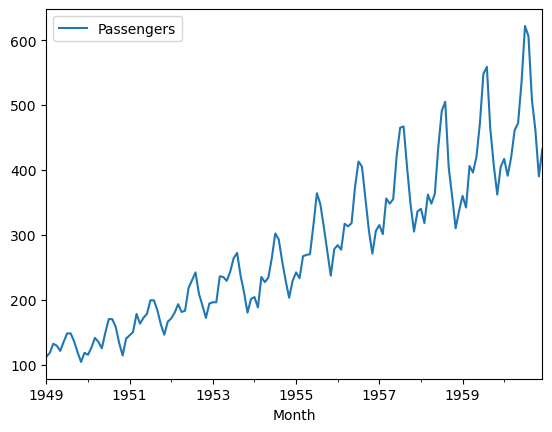

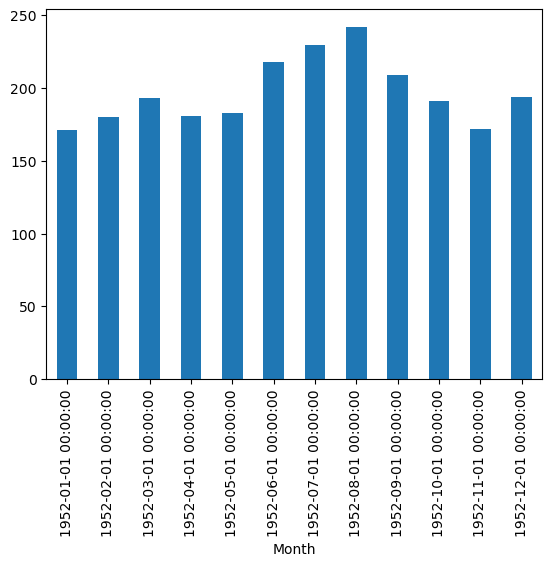

In [ ]:
#Load time series dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
air_passengers = pd.read_csv("airline-passengers.csv", index_col = 0, parse_dates = True)
air_passengers.head()
air_passengers.plot()
air_passengers["1952"].plot(kind = "bar", legend = False)

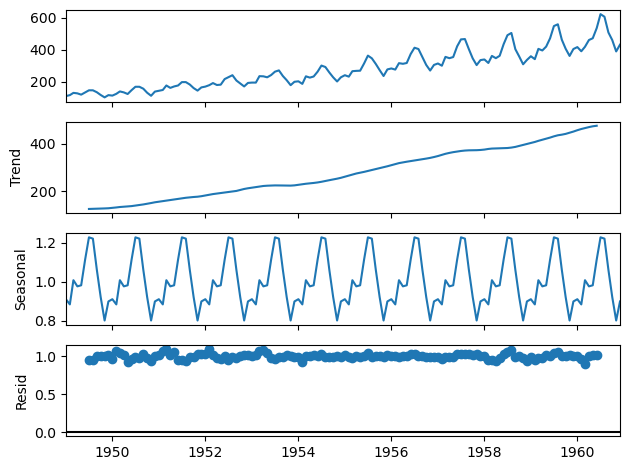

In [ ]:
#Decompose time series to see components like trend, seasonality, noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(air_passengers, model="multiplicative")
trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid
decompose_result.plot();

<Axes: title={'center': 'Rolling mean over 20 month period'}, xlabel='Month'>

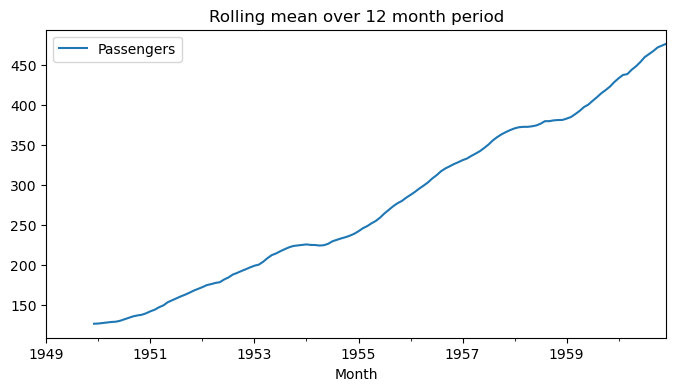

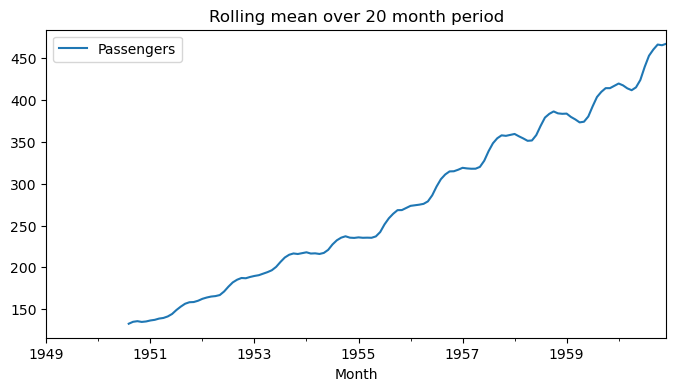

In [ ]:
#Checking if time series is stationary or not with mean
air_passengers.rolling(window=12).mean().plot(figsize=(8,4), title = "Rolling mean over 12 month period")
air_passengers.rolling(window=20).mean().plot(figsize=(8,4), title = "Rolling mean over 20 month period")

<Axes: title={'center': 'Rolling variance over 20 month period'}, xlabel='Month'>

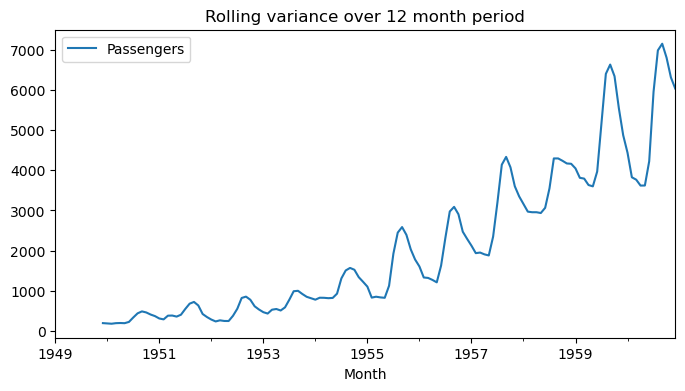

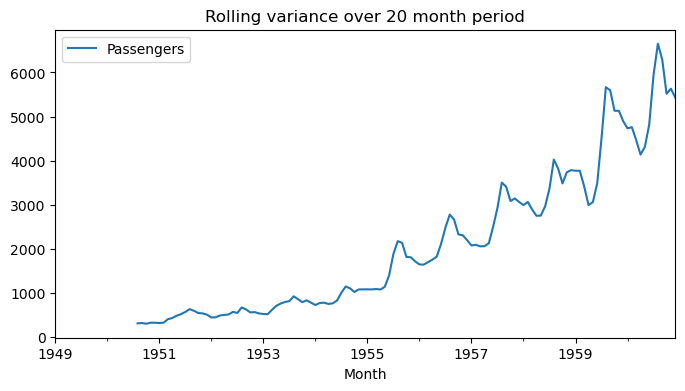

In [ ]:
#Checking if time series is stationary or not with mean
air_passengers.rolling(window=12).var().plot(figsize=(8,4), title = "Rolling variance over 12 month period")
air_passengers.rolling(window=20).var().plot(figsize=(8,4), title = "Rolling variance over 20 month period")

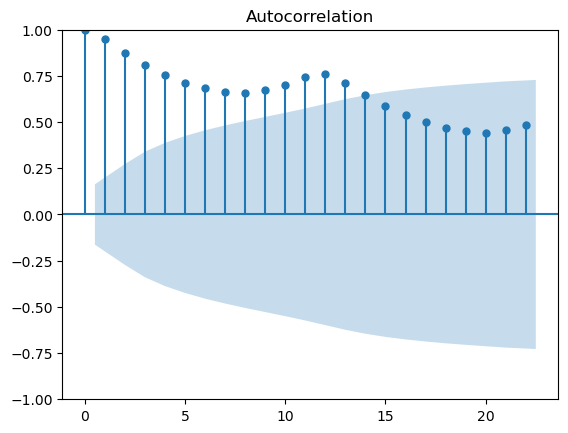

In [ ]:
#Plotting an auto correlation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(air_passengers);

In [ ]:
#dicky fuller test for stationarity, since p value is greater than 0.05 the time series is non stationary
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(air_passengers["Passengers"], autolag = "AIC")
print("1.ADF : ",dftest[0])
print("2.P-value : ",dftest[1])
print("3.Num of Lags : ",dftest[2])
print("4.Num of observations used for ADF regressions and critical values calculation : ",dftest[3])
print("5.Critical values : ")
for key, val in dftest[4].items():
    print("\t", key, " : ", val)

1.ADF :  0.8153688792060597
2.P-value :  0.9918802434376411
3.Num of Lags :  13
4.Num of observations used for ADF regressions and critical values calculation :  130
5.Critical values : 
	 1%  :  -3.4816817173418295
	 5%  :  -2.8840418343195267
	 10%  :  -2.578770059171598


<Axes: title={'center': 'Original Values'}, xlabel='Month'>

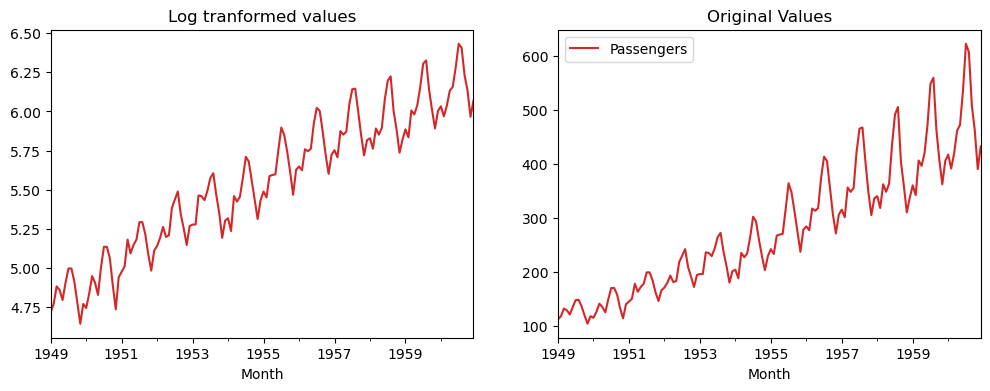

In [ ]:
#removing trend using logged transformation (1)
logged_passengers = air_passengers["Passengers"].apply(lambda x: np.log(x))
ax1 = plt.subplot(121)
logged_passengers.plot(figsize=(12,4), color = "tab:red", title = "Log tranformed values", ax=ax1)
ax2 = plt.subplot(122)
air_passengers.plot(color = "tab:red", title = "Original Values", ax=ax2)

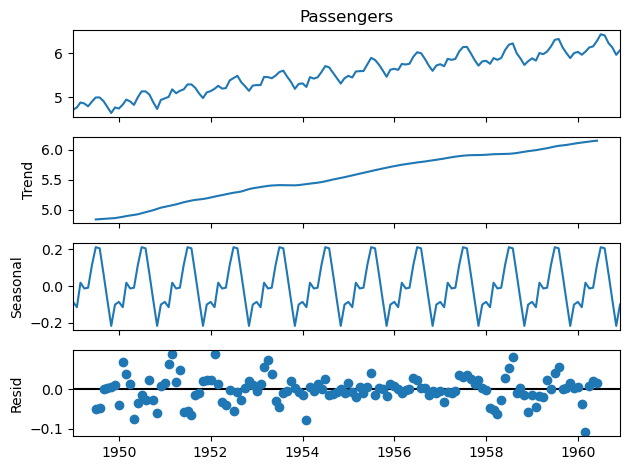

In [ ]:
decompose_result = seasonal_decompose(logged_passengers)
decompose_result.plot();

<Axes: title={'center': 'Original values'}, xlabel='Month'>

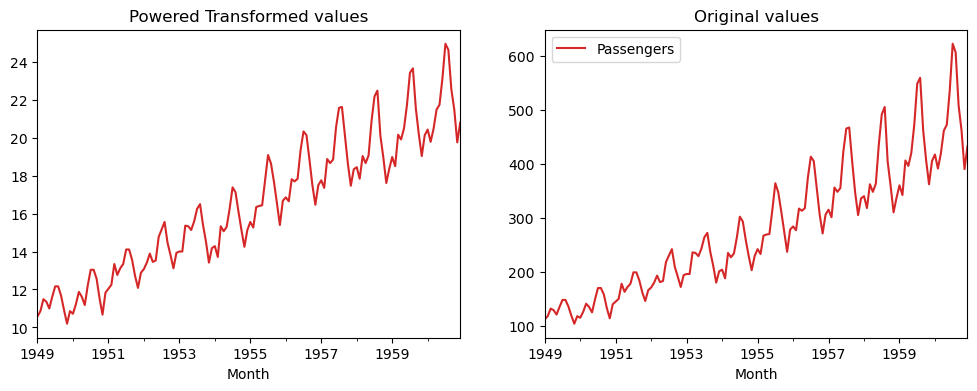

In [ ]:
#removing trend using power transformation (2)
powered_passengers = air_passengers["Passengers"].apply(lambda x: x**0.5)
ax1 = plt.subplot(121)
powered_passengers.plot(figsize = (12, 4), color = "tab:red", title = "Powered Transformed values", ax=ax1)
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color = "tab:red", title = "Original values", ax=ax2)

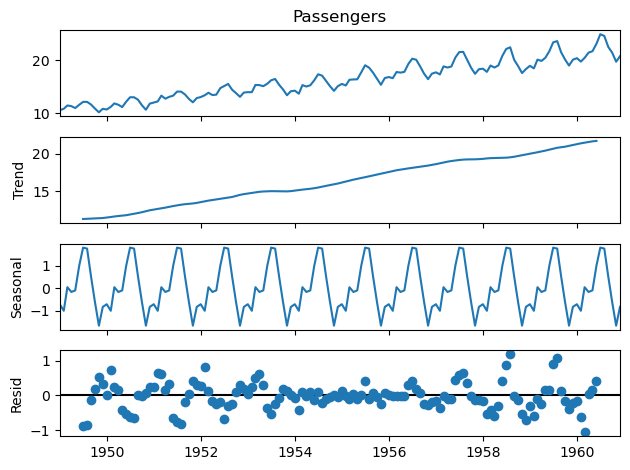

In [ ]:
decompose_result = seasonal_decompose(powered_passengers)
decompose_result.plot();

<Axes: title={'center': 'Original values'}, xlabel='Month'>

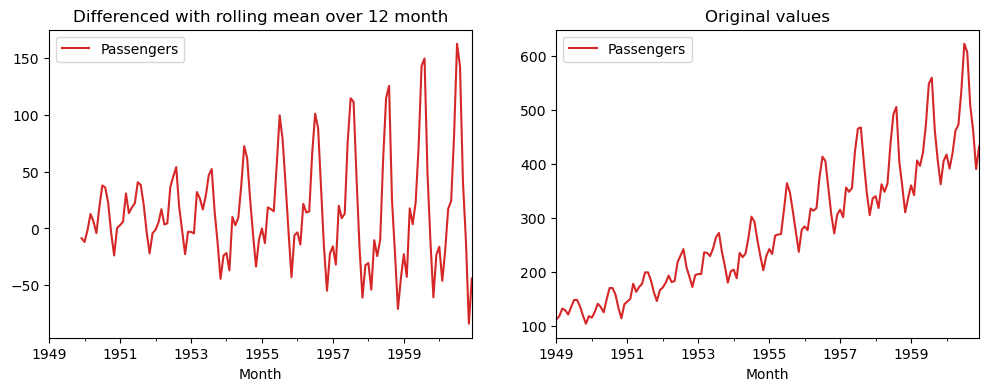

In [ ]:
#removing trend using moving window functions (3)
rolling_mean = air_passengers.rolling(window = 12).mean()
passengers_rolled_detrended = air_passengers - rolling_mean
ax1 = plt.subplot(121)
passengers_rolled_detrended.plot(figsize = (12, 4), color = "tab:red", title = "Differenced with rolling mean over 12 month", ax=ax1)
ax2 = plt.subplot(122)
air_passengers.plot(figsize = (12, 4), color = "tab:red", title = "Original values", ax=ax2)

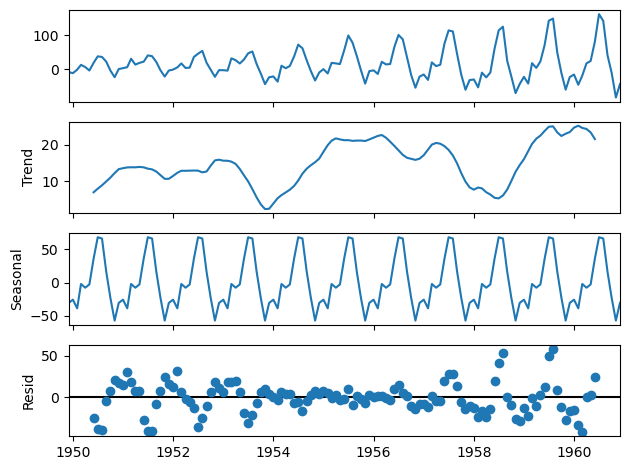

In [ ]:
decompose_result = seasonal_decompose(passengers_rolled_detrended.dropna())
decompose_result.plot();

<Axes: title={'center': 'Original values'}, xlabel='Month'>

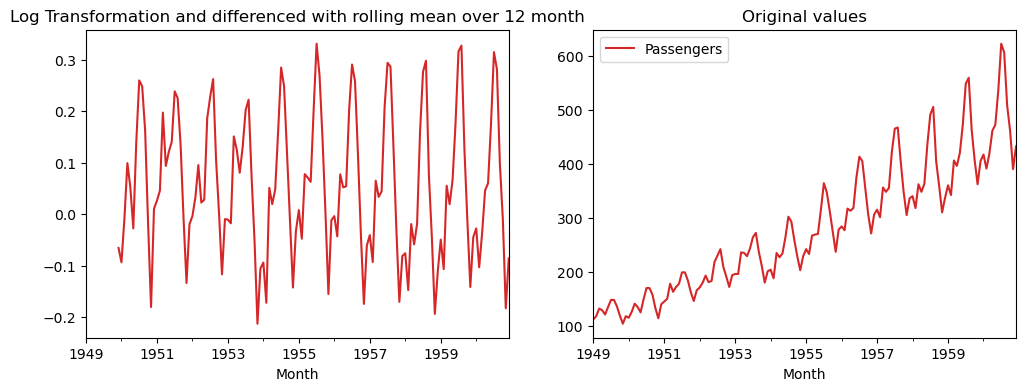

In [ ]:
#removing trend using moving window function on log transformed time series (4)
logged_passengers = pd.DataFrame(air_passengers["Passengers"].apply(lambda x: np.log(x)))
rolling_mean = logged_passengers.rolling(window=12).mean()
passengers_log_rolled_detrended = logged_passengers["Passengers"]-rolling_mean["Passengers"]
ax1 = plt.subplot(121)
passengers_log_rolled_detrended.plot(figsize=(12,4), color = "tab:red", title = "Log Transformation and differenced with rolling mean over 12 month", ax=ax1)
ax2 = plt.subplot(122)
air_passengers.plot(figsize = (12,4), color = "tab:red", title = "Original values", ax=ax2)

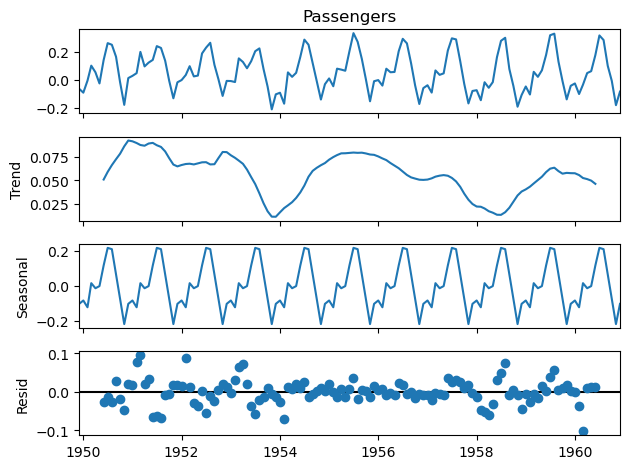

In [ ]:
decompose_result = seasonal_decompose(passengers_log_rolled_detrended.dropna())
decompose_result.plot();

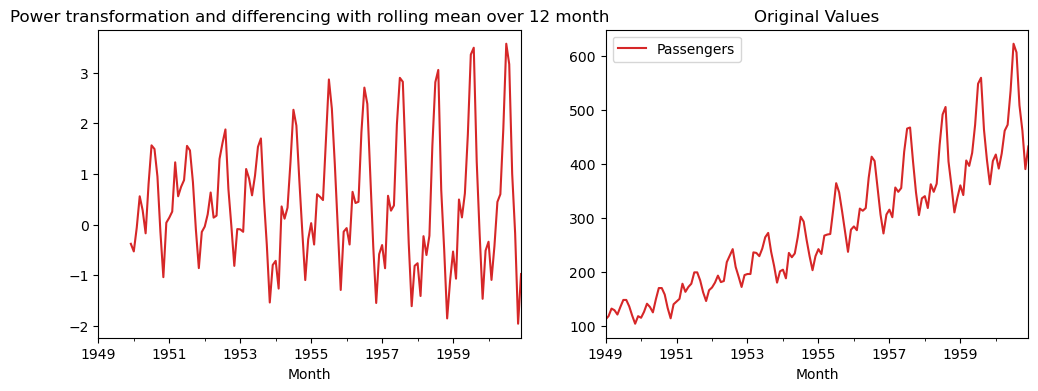

In [ ]:
#removing trend using moving window function on power transformed time series (5)
powered_passengers = pd.DataFrame(air_passengers["Passengers"].apply(lambda x: x**0.5))
rolling_mean = powered_passengers.rolling(window = 12).mean()
passengers_pow_rolled_detrended = powered_passengers["Passengers"]-rolling_mean["Passengers"]
ax1 = plt.subplot(121)
passengers_pow_rolled_detrended.plot(figsize = (12, 4), color = "tab:red", title = "Power transformation and differencing with rolling mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

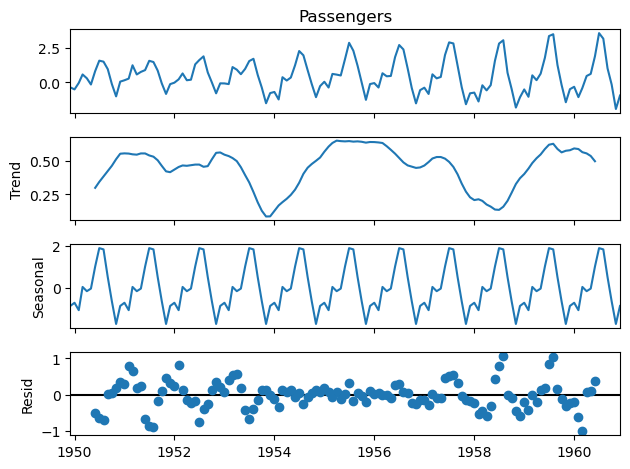

In [ ]:
decompose_result = seasonal_decompose(passengers_pow_rolled_detrended.dropna())
decompose_result.plot();

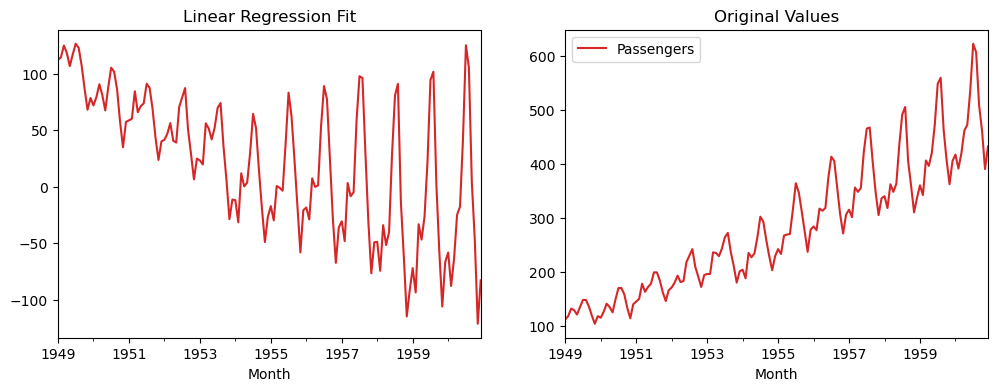

In [ ]:
#removing trend using linear regression(6)
from statsmodels.regression.linear_model import OLS
least_squares = OLS(air_passengers["Passengers"].values, list(range(air_passengers.shape[0])))
result = least_squares.fit()
fit = pd.Series(result.predict(list(range(air_passengers.shape[0]))), index = air_passengers.index)
passengers_ols_detrended = air_passengers["Passengers"] - fit
ax1 = plt.subplot(121)
passengers_ols_detrended.plot(figsize=(12,4), color="tab:red", title="Linear Regression Fit",
ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

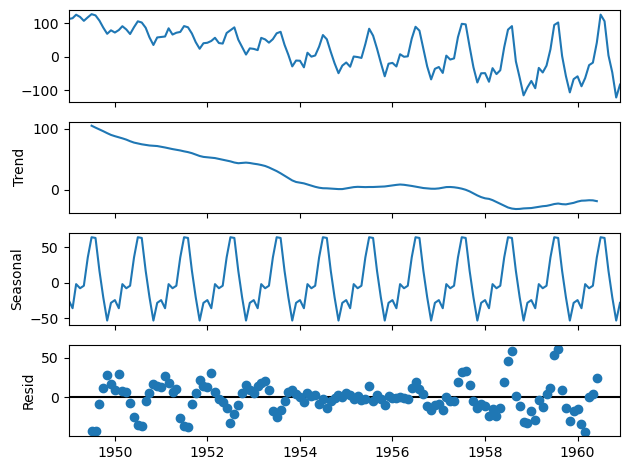

In [ ]:
decompose_result = seasonal_decompose(passengers_ols_detrended.dropna())
decompose_result.plot();

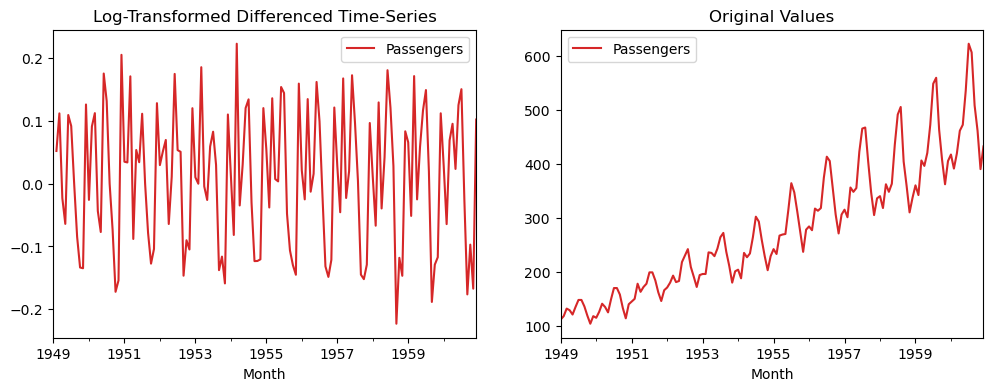

In [ ]:

logged_passengers_diff = logged_passengers - logged_passengers.shift()
ax1 = plt.subplot(121)
logged_passengers_diff.plot(figsize=(12,4), color="tab:red", title="Log-Transformed Differenced Time-Series", ax=ax1)
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [ ]:
dftest = adfuller(logged_passengers_diff.dropna()["Passengers"].values, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :",
dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key,": ", val)

1. ADF :  -2.7171305983881675
2. P-Value :  0.07112054815085295
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 128
5. Critical Values :
	 1% :  -3.4825006939887997
	 5% :  -2.884397984161377
	 10% :  -2.578960197753906


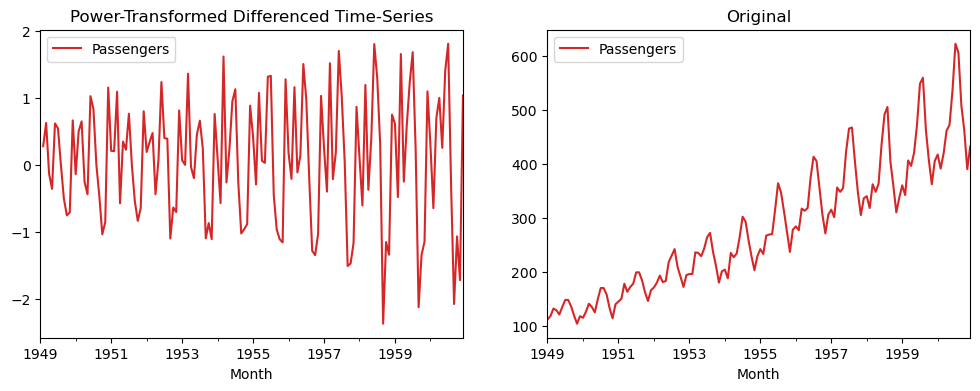

In [ ]:

powered_passengers_diff = powered_passengers - powered_passengers.shift()
ax1 = plt.subplot(121)
powered_passengers_diff.plot(figsize=(12,4), color="tab:red", title="Power-Transformed Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original", ax=ax2);

In [ ]:
dftest = adfuller(powered_passengers_diff["Passengers"].dropna().values, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value :", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :",
dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.1864222911641957
2. P-Value : 0.02078418557126802
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


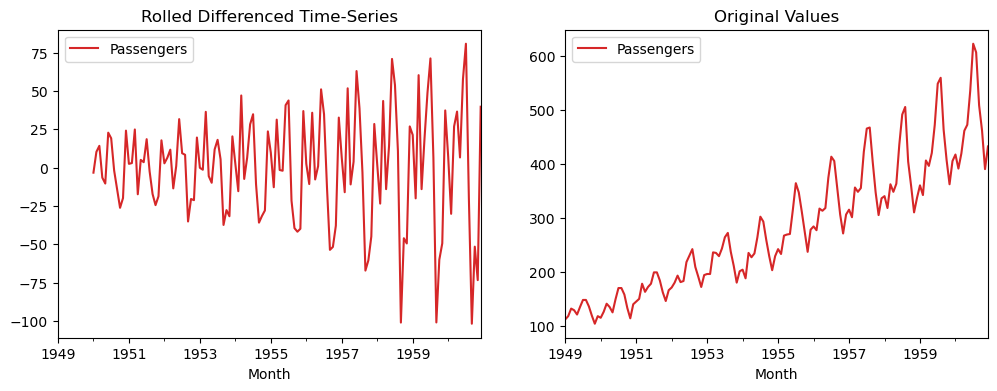

In [ ]:
#removing seasonality using moving window functions (3)
passengers_rolled_detrended_diff = passengers_rolled_detrended - passengers_rolled_detrended.shift()
ax1 = plt.subplot(121)
passengers_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Rolled Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [ ]:
dftest = adfuller(passengers_rolled_detrended_diff.dropna()["Passengers"].values, autolag ='AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :",dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.1544826348635344
2. P-Value :  0.022775264967861898
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 119
5. Critical Values :
	 1% :  -3.4865346059036564
	 5% :  -2.8861509858476264
	 10% :  -2.579896092790057


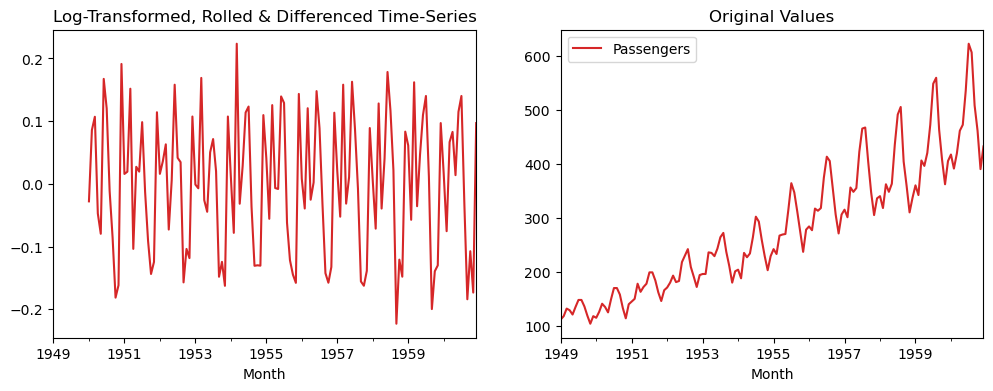

In [ ]:
passengers_log_rolled_detrended_diff = passengers_log_rolled_detrended - passengers_log_rolled_detrended.shift()
ax1 = plt.subplot(121)
passengers_log_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Log-Transformed, Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [ ]:
dftest = adfuller(passengers_log_rolled_detrended_diff.dropna().values, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value :", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation ",dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key,": ", val)

1. ADF :  -3.9129812454195063
2. P-Value : 0.001941362376936528
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation  118
5. Critical Values :
	 1% :  -3.4870216863700767
	 5% :  -2.8863625166643136
	 10% :  -2.580009026141913


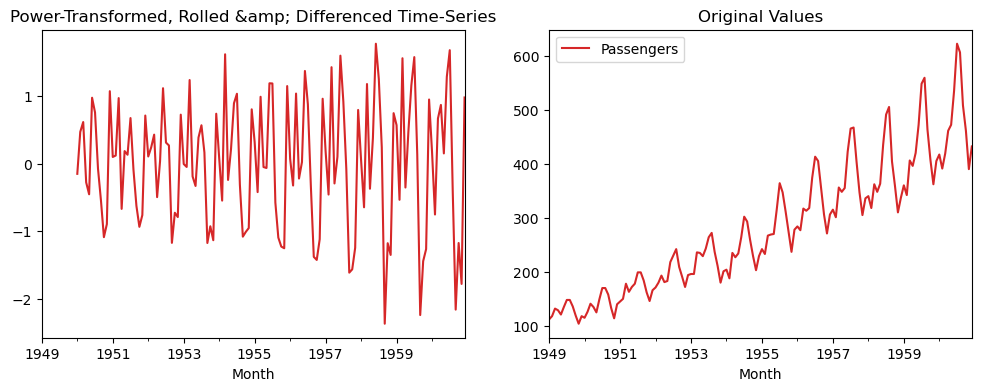

In [ ]:
passengers_pow_rolled_detrended_diff = passengers_pow_rolled_detrended -passengers_pow_rolled_detrended.shift()
ax1 = plt.subplot(121)
passengers_pow_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Power-Transformed, Rolled &amp; Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [ ]:
dftest = adfuller(passengers_pow_rolled_detrended_diff.dropna().values, autolag = 'AIC')
print("1. ADF :",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags :", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :",dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF : -3.622485336190726
2. P-Value :  0.005345423958262597
3. Num Of Lags : 13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 118
5. Critical Values :
	 1% :  -3.4870216863700767
	 5% :  -2.8863625166643136
	 10% :  -2.580009026141913


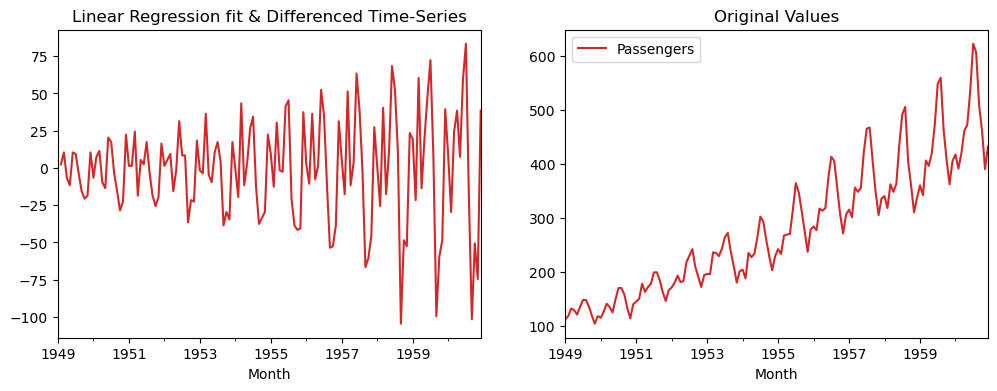

In [ ]:
passengers_ols_detrended_diff = passengers_ols_detrended - passengers_ols_detrended.shift()
ax1 = plt.subplot(121)
passengers_ols_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Linear Regression fit & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(passengers_ols_detrended_diff.dropna().values, autolag = 'AIC')
print("1. ADF :",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :",dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF : -2.8292668241699914
2. P-Value :  0.05421329028382656
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598
